In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

## Data cleaning and transformation

In [34]:
# Filling NaN values with zero
deliveries.fillna(0,inplace=True)
matches.fillna(0, inplace=True)

In [35]:
# Removing the umpire column because it contains only NULL values
matches.drop(['umpire3'],axis=1,inplace=True)

In [41]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [43]:
len(deliveries['match_id'].unique()) #Total number of matches

636

In [44]:
# Printing the seasons of IPL in ascending order
season = matches['season'].unique()
season.sort()
print(season)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [45]:
matches.iloc[:5,:5]

,id,season,city,date,team1
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad
1,2,2017,Pune,2017-04-06,Mumbai Indians
2,3,2017,Rajkot,2017-04-07,Gujarat Lions
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore


In [46]:
# Runs scored by Shikhar Dhawan
sum(deliveries[deliveries['batsman'] == 'S Dhawan']['batsman_runs'])

3561

In [47]:
# Highest run scorers in IPL
top_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)
top_scorers = pd.DataFrame({'batsman' : top_scorers.index, 'runs' : top_scorers.values})
top_scorers.head()

,batsman,runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014


In [48]:
# All the teams in IPL
print(deliveries['batting_team'].unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants']


In [49]:
# Which team has won how many matches
num_wins = matches.groupby('winner')['winner'].count().sort_values(ascending = False)
num_wins = pd.DataFrame({'winner':num_wins.index, 'wins':num_wins.values})
num_wins

,winner,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


In [50]:
#Most number of deliveries bowled by a bowler in IPL
num_balls = deliveries.groupby('bowler')['bowler'].count().sort_values(ascending=False)
num_balls = pd.DataFrame({'bowler':num_balls.index, 'num_balls':num_balls.values})
num_balls.head()

,bowler,num_balls
0,Harbhajan Singh,2989
1,A Mishra,2703
2,SL Malinga,2694
3,P Kumar,2637
4,PP Chawla,2594


In [72]:
#Top 10 wicket takers in IPL
deliveries.head(100)
delv_nro = deliveries[deliveries['player_dismissed'] != 0]
delv_nro = delv_nro[delv_nro['dismissal_kind'] != 'run out']
delv_nro['player_dismissed'].head(100)
delv_nro = delv_nro[delv_nro['noball_runs'] == 0]
wickets = delv_nro.groupby('bowler')['bowler'].count()
top_wicket_takers = wickets.sort_values(ascending=False)
top_wicket_takers = pd.DataFrame({'bowler' :top_wicket_takers.index, 'wickets' : top_wicket_takers.values})
top_wicket_takers.head(10)

,bowler,wickets
0,SL Malinga,154
1,A Mishra,134
2,Harbhajan Singh,127
3,PP Chawla,126
4,DJ Bravo,122
5,B Kumar,111
6,A Nehra,106
7,Z Khan,103
8,R Vinay Kumar,103
9,R Ashwin,100


In [73]:
#Most number of catches in IPL including wicketkeepers
catches = deliveries[deliveries['dismissal_kind'] == 'caught'].groupby('fielder')['fielder'].count()
highest_catches = catches.sort_values(ascending=False)
highest_catches = pd.DataFrame({'fielder':highest_catches.index, 'catches':highest_catches.values})
highest_catches.head()

,fielder,catches
0,KD Karthik,88
1,SK Raina,83
2,AB de Villiers,81
3,MS Dhoni,76
4,RV Uthappa,75


In [74]:
#Most run outs in ipl
run_outs = deliveries[deliveries['dismissal_kind']=='run out'].groupby('fielder')['fielder'].count()
run_outs = run_outs.sort_values(ascending=False)
run_outs = pd.DataFrame({'player' : run_outs.index, 'run_outs' : run_outs.values})
run_outs.head()

,player,run_outs
0,MS Dhoni,20
1,RA Jadeja,19
2,MK Pandey,14
3,V Kohli,14
4,SK Raina,13


In [75]:
#Most sixes in IPL
no_sixes = deliveries[deliveries['batsman_runs']==6].groupby('batsman')['batsman'].count().sort_values(ascending=False)
no_sixes = pd.DataFrame({'batsman' : no_sixes.index, 'sixes':no_sixes.values})
no_sixes.head(10)

,batsman,sixes
0,CH Gayle,266
1,SK Raina,174
2,RG Sharma,173
3,DA Warner,160
4,V Kohli,160
5,AB de Villiers,158
6,MS Dhoni,156
7,YK Pathan,149
8,KA Pollard,148
9,Yuvraj Singh,141


In [76]:
#Most fours by batsman
no_fours = deliveries[deliveries['batsman_runs']==4].groupby('batsman')['batsman'].count().sort_values(ascending=False)
no_fours = pd.DataFrame({'batsman' : no_fours.index, 'fours':no_fours.values})
no_fours.head()

,batsman,fours
0,G Gambhir,484
1,SK Raina,402
2,DA Warner,401
3,S Dhawan,401
4,V Kohli,384


In [77]:
#Most doubles in IPL
no_doubles = deliveries[deliveries['batsman_runs']==2].groupby('batsman')['batsman'].count().sort_values(ascending=False)
no_doubles = pd.DataFrame({'batsman' : no_doubles.index, 'doubles':no_doubles.values})
no_doubles.head()

,batsman,doubles
0,MS Dhoni,251
1,G Gambhir,245
2,SK Raina,242
3,V Kohli,242
4,DA Warner,207


In [78]:
#Most three runs in IPL
most_threes = deliveries[deliveries['batsman_runs']==3].groupby('batsman')['batsman'].count().sort_values(ascending=False)
most_threes = pd.DataFrame({'batsman' : most_threes.index, 'threes':most_threes.values})
most_threes.head()

,batsman,threes
0,M Vijay,17
1,S Dhawan,16
2,G Gambhir,15
3,AM Rahane,14
4,DA Warner,13


In [79]:
# Types of result in IPl
print(matches['result'].unique())

['normal' 'tie' 'no result']


In [80]:
#No of no result matches in IPL
noresult = len(matches[matches['result'] == 'no result'])
print(" Number of matches having no result is",format(noresult))

 Number of matches having no result is 3


In [81]:
#No. of tie matches in IPL.
tie = len(matches[matches['result']=='tie'])
print("In {} matches, both the team had the same score".format(tie))

In 7 matches, both the team had the same score


In [82]:
#Seasonwise number of matches in IPL
swmatches = matches.groupby('season')['season'].count()
swmatches = pd.DataFrame({'season' : swmatches.index, 'matches' : swmatches.values})
swmatches

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [83]:
#Team winning most number of tosses in IPL
tosses = matches.groupby('toss_winner')['toss_winner'].count().sort_values(ascending= False)
tosses = pd.DataFrame({'team' : tosses.index, 'tosses':tosses.values})
tosses.head()

,team,tosses
0,Mumbai Indians,85
1,Kolkata Knight Riders,78
2,Delhi Daredevils,72
3,Royal Challengers Bangalore,70
4,Kings XI Punjab,68


In [108]:
#Team winning most matches in IPL seasonwise
seasonwise_wins = matches.groupby(['season','winner'])['winner'].count()
seasonwise_wins

season  winner                     
2008    Chennai Super Kings             9
        Deccan Chargers                 2
        Delhi Daredevils                7
        Kings XI Punjab                10
        Kolkata Knight Riders           6
                                       ..
2017    Kolkata Knight Riders           9
        Mumbai Indians                 12
        Rising Pune Supergiant         10
        Royal Challengers Bangalore     3
        Sunrisers Hyderabad             8
Name: winner, Length: 86, dtype: int64

In [135]:
#Team winning most matches overall
winners = matches.groupby('winner')['winner'].count().sort_values(ascending=False)
winnerslist = pd.DataFrame({'team':winners.index, 'wins':winners.values})
winnerslist.head()

,team,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70


In [136]:
#No. of matches hosted city wise
city = matches.groupby('city')['city'].count().sort_values(ascending =False)
cities = pd.DataFrame({'city':city.index, 'matches':city.values})
cities.head()

,city,matches
0,Mumbai,85
1,Bangalore,66
2,Kolkata,61
3,Delhi,60
4,Hyderabad,49


In [137]:
man_of_match = matches.groupby('player_of_match')['player_of_match'].count().sort_values(ascending = False)
man_of_match = pd.DataFrame({'player':man_of_match.index, 'times':man_of_match.values})
man_of_match.head(10)

,player,times
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,SK Raina,14
5,RG Sharma,14
6,MS Dhoni,13
7,G Gambhir,13
8,MEK Hussey,12
9,AM Rahane,12


In [139]:
#Highest individual score by a batsman in IPL
highest_score = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index()
highest_score.head(10)

,match_id,batsman,batsman_runs
0,411,CH Gayle,175
1,60,BB McCullum,158
2,562,AB de Villiers,133
3,620,AB de Villiers,129
4,372,CH Gayle,128
5,206,M Vijay,127
6,36,DA Warner,126
7,516,V Sehwag,122
8,243,PC Valthaty,120
9,279,V Sehwag,119


In [173]:
#Most sixes in a inning in ipl
sixes = deliveries[deliveries['batsman_runs'] == 6]
sixes = sixes.groupby(['match_id', 'batsman'])['batsman_runs'].count().sort_values(ascending = False).reset_index()
sixes.rename(columns = {'batsman_runs':'no_sixes'}, inplace = True)
sixes.head(10)

,match_id,batsman,no_sixes
0,411,CH Gayle,17
1,372,CH Gayle,13
2,60,BB McCullum,13
3,620,AB de Villiers,12
4,557,CH Gayle,12
5,206,M Vijay,11
6,96,ST Jayasuriya,11
7,72,AC Gilchrist,10
8,392,CH Gayle,9
9,41,RR Pant,9


In [174]:
#number_of_balls faced by each batsman in ipl
balls_faced = deliveries[deliveries['wide_runs']==0]
balls_faced = balls_faced.groupby('batsman')['batsman'].count().sort_values(ascending=False)
balls_faced = pd.DataFrame({'batsman' : balls_faced.index, 'balls_played' : balls_faced.values})
balls_faced.head(15)

,batsman,balls_played
0,V Kohli,3405
1,G Gambhir,3316
2,SK Raina,3267
3,RG Sharma,3214
4,S Dhawan,2922
5,RV Uthappa,2870
6,DA Warner,2825
7,MS Dhoni,2604
8,AM Rahane,2535
9,CH Gayle,2409


In [177]:
#Most runs conceded in an inning by a bowler
max_runs_conceded = deliveries.groupby(['bowler','match_id'])['total_runs'].sum().sort_values(ascending=False).reset_index()
#max_runs_conceded = pd.DataFrame({'bowler':max_runs_conceded.index, 'runs':max_runs_conceded.values})
max_runs_conceded.head() 

,bowler,match_id,total_runs
0,Sandeep Sharma,496,66
1,I Sharma,435,66
2,PJ Cummins,44,65
3,UT Yadav,438,65
4,VR Aaron,380,63


In [178]:
#Numbers of Umpires involved
arr1 = matches['umpire1'].unique() 
arr2 = matches['umpire2'].unique()
arr = list(set(arr1).union(arr2))
len(arr)

55

In [179]:
#Highest scorers in a match
highest_score =deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().sort_values(ascending = False).reset_index()
highest_score.head()

,match_id,batsman,batting_team,batsman_runs
0,411,CH Gayle,Royal Challengers Bangalore,175
1,60,BB McCullum,Kolkata Knight Riders,158
2,562,AB de Villiers,Royal Challengers Bangalore,133
3,620,AB de Villiers,Royal Challengers Bangalore,129
4,372,CH Gayle,Royal Challengers Bangalore,128


In [180]:
# Highest number of centuries
centuries = highest_score[highest_score['batsman_runs'] > 100].groupby('batsman')['batsman'].count().sort_values(ascending= False)
centuries = pd.DataFrame({'batsman' : centuries.index, '100s' : centuries.values})
centuries.head()

,batsman,100s
0,CH Gayle,5
1,V Kohli,3
2,AB de Villiers,3
3,DA Warner,3
4,M Vijay,2


## Dataset visualization

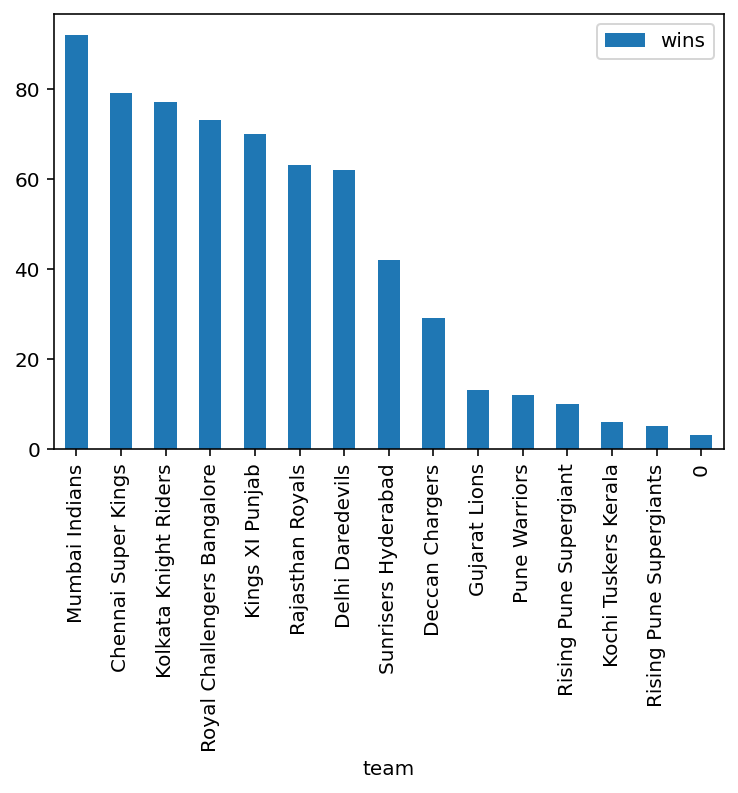

In [181]:
winnerslist.plot.bar('team','wins')

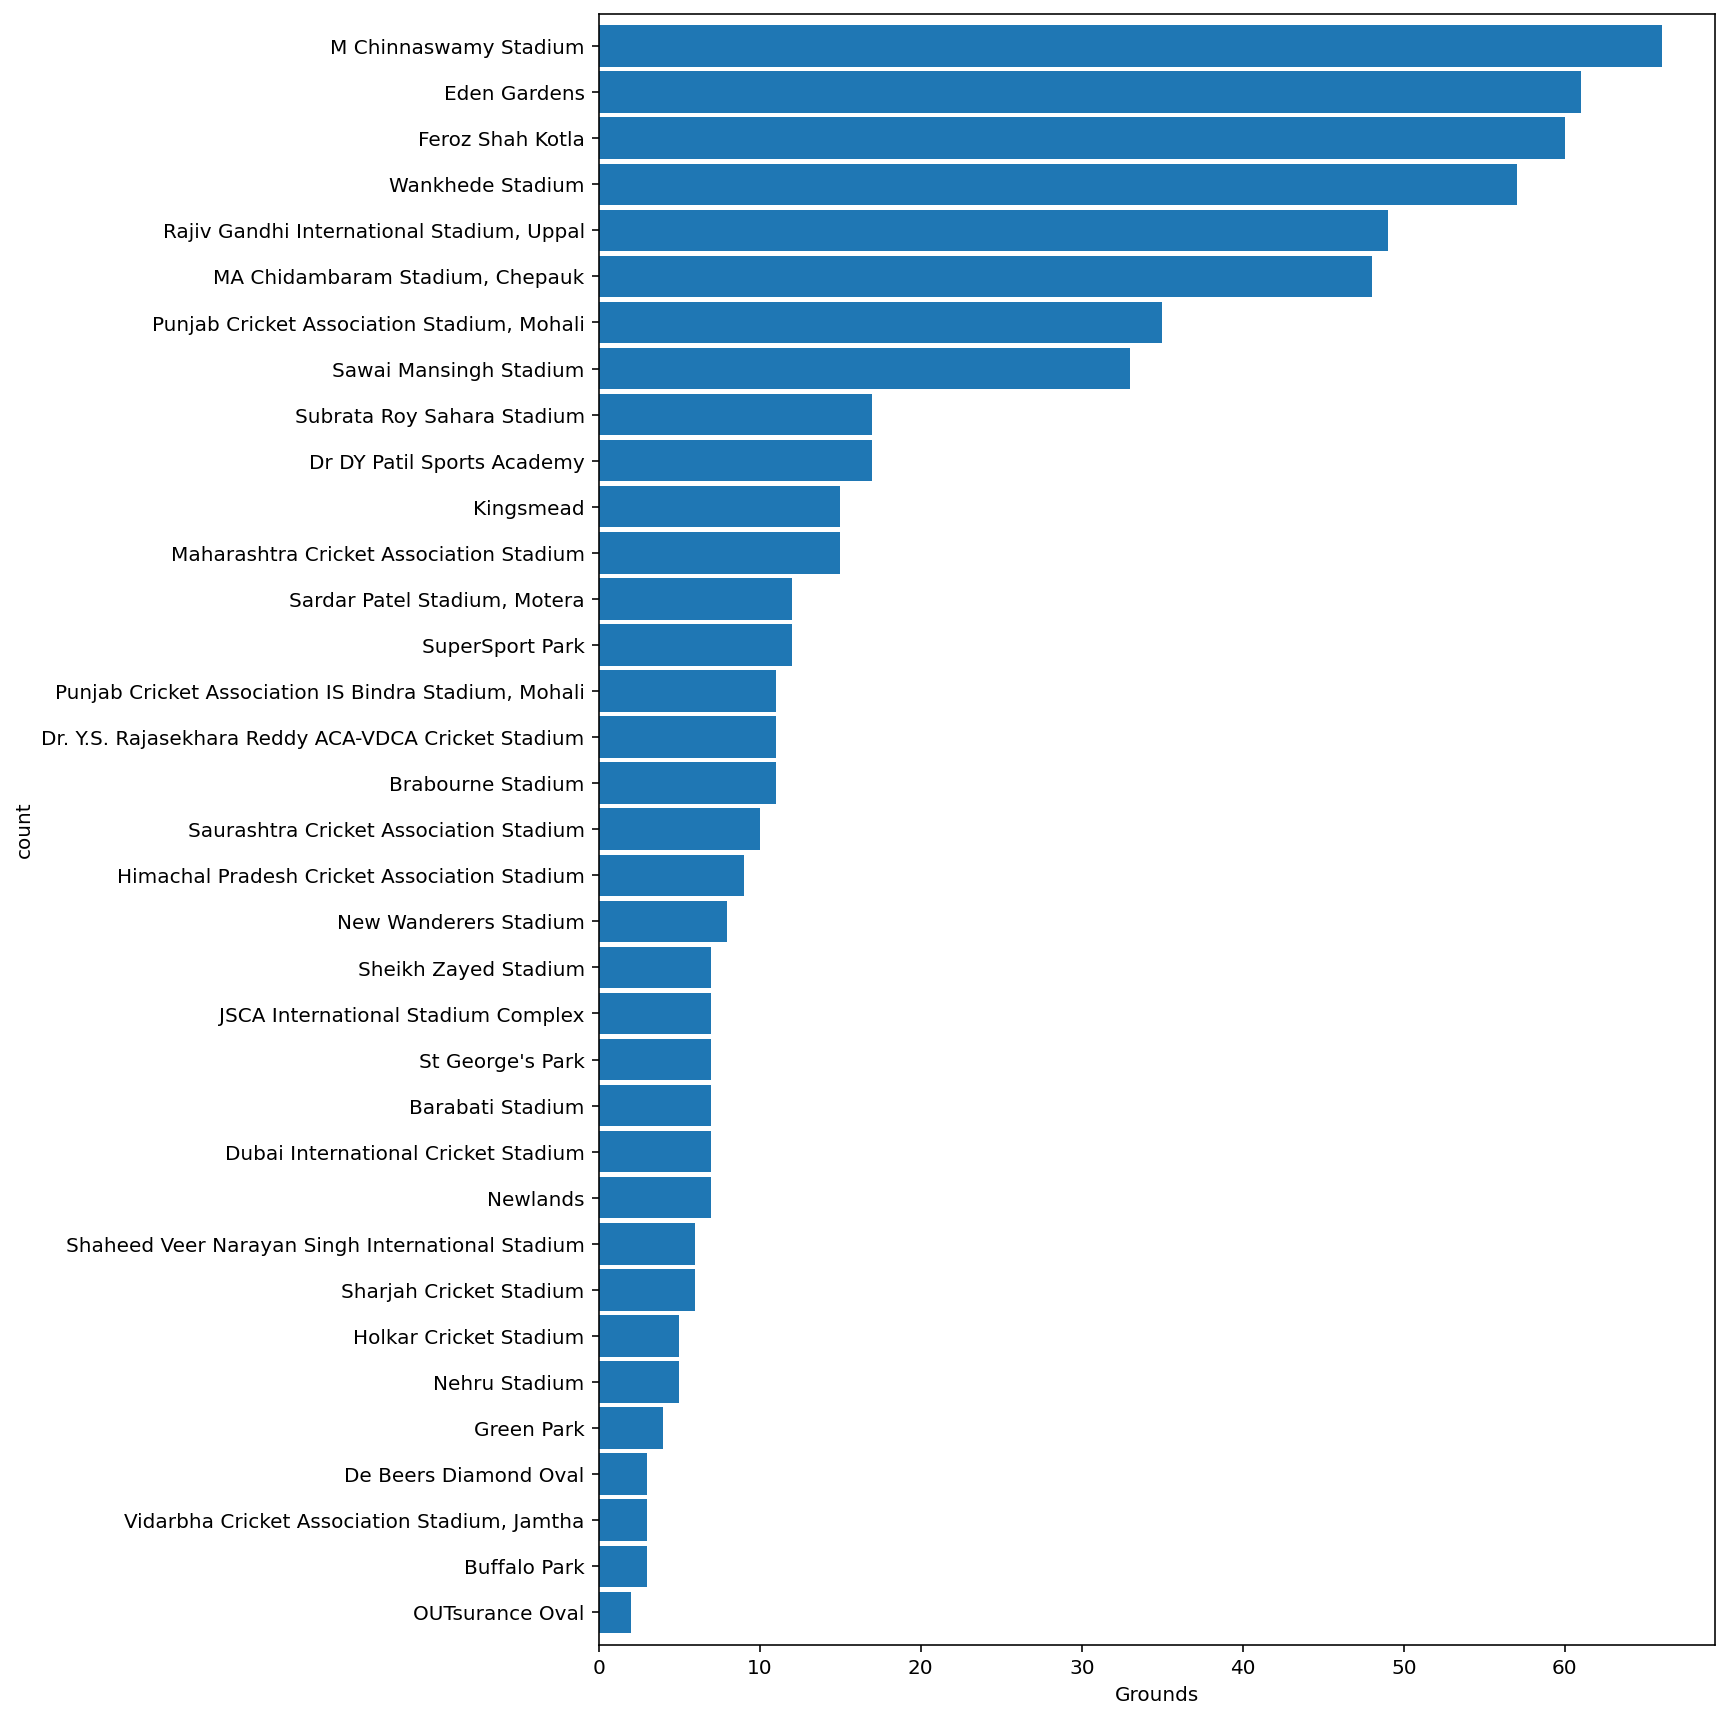

In [183]:
#Favourite cricket stadium using horizontal bar plot
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

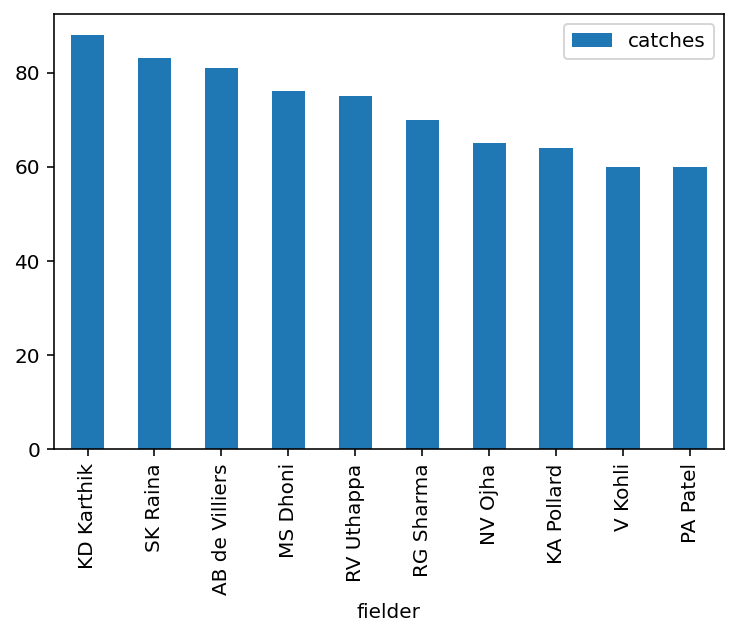

In [185]:
# Bar plot of top 10 fielders with highest catches
highest_catches.head(10).plot.bar(x='fielder',y='catches')

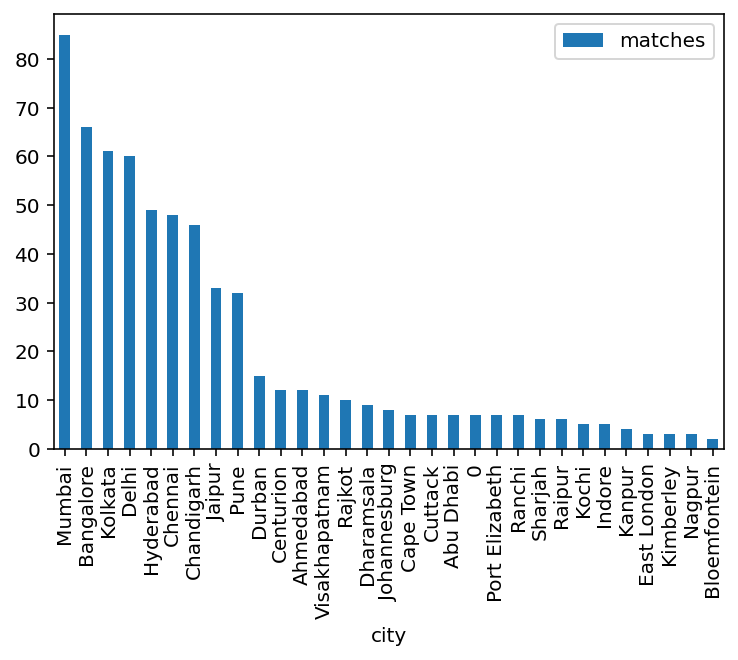

In [186]:
cities.plot.bar('city','matches')

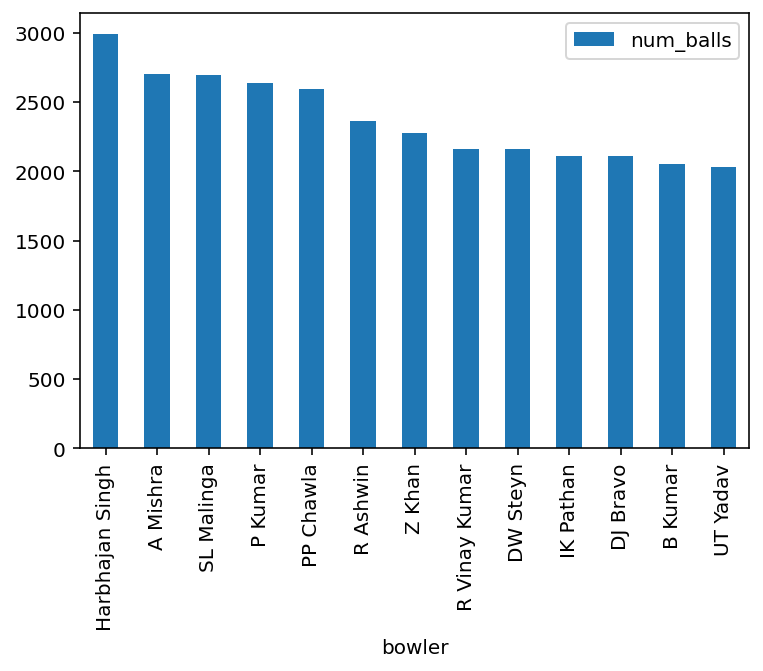

In [187]:
# bar plot of the bowlers who have delivered more than 2000 balls
num_balls[num_balls['num_balls'] > 2000].plot.bar(x='bowler',y='num_balls')

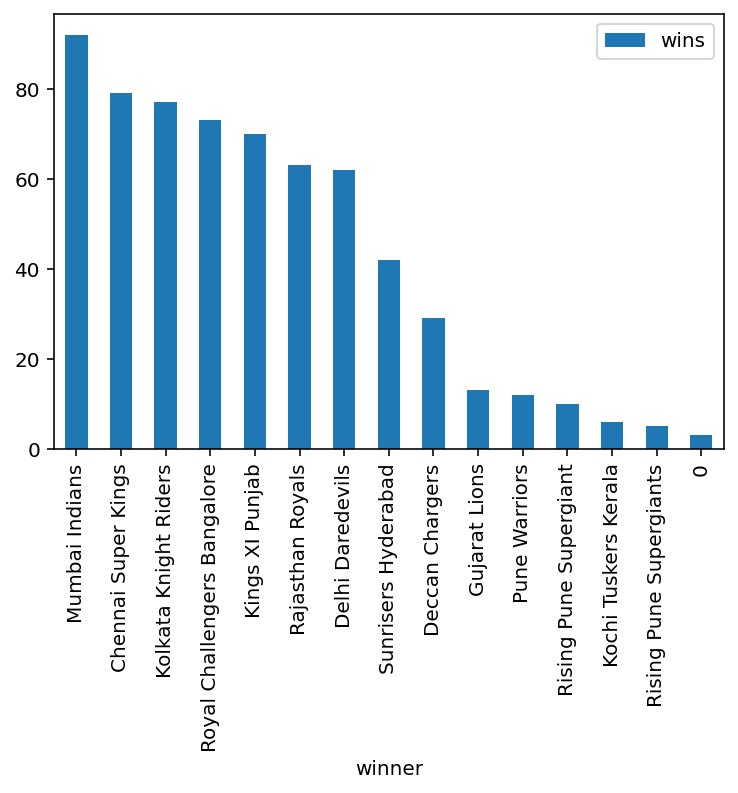

In [188]:
# Bar plot of the teams vs the number of matches they have won
num_wins.plot.bar('winner','wins')

## Result Prediction

In [189]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()

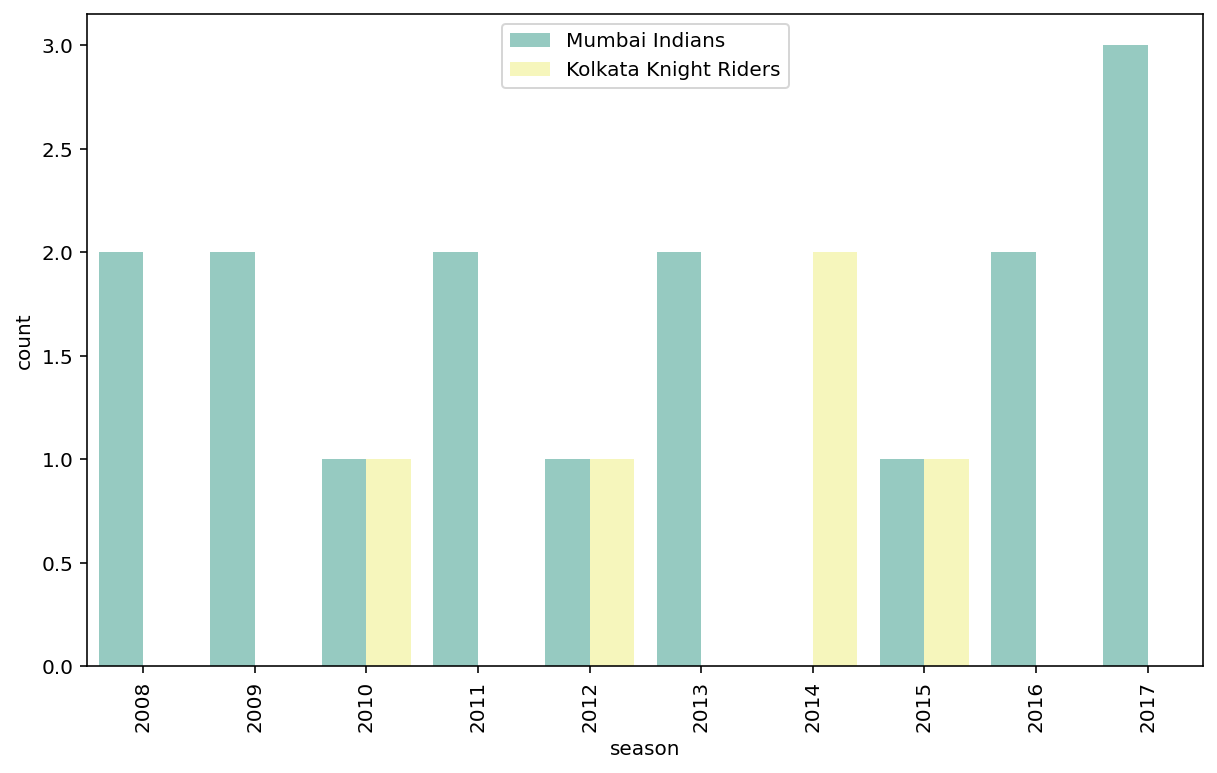

In [190]:
team1_vs_team2('Kolkata Knight Riders','Mumbai Indians')

In [0]:
high_scores=deliveries.groupby(['match_id','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,batting_team,bowling_team,total_runs
820,411,Royal Challengers Bangalore,Pune Warriors,263
1237,620,Royal Challengers Bangalore,Gujarat Lions,248
410,206,Chennai Super Kings,Rajasthan Royals,246
120,61,Chennai Super Kings,Kings XI Punjab,240
1121,562,Royal Challengers Bangalore,Mumbai Indians,235
590,296,Kings XI Punjab,Royal Challengers Bangalore,232
516,259,Delhi Daredevils,Kings XI Punjab,231
970,486,Kings XI Punjab,Chennai Super Kings,231
98,50,Kings XI Punjab,Mumbai Indians,230
1156,580,Royal Challengers Bangalore,Sunrisers Hyderabad,227
